> We are going to use the `USA_Housing` or `sample_data/california_housing...` dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city hou  se is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house

Let's try and create a model that can predict the price of a house based on the variables and historical data


# Import standard libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions





In [3]:
%matplotlib inline

plt.rc('figure', figsize=(10, 10))

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv("/Users/jvang/Documents/Projects/Applied_AI_IT_Uni/day02/USA_Housing.csv")

## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names

Questions:

1. What is the dependent variable (column name)?
2. What are the independent variables?
3. Should we normalize the data?
4. What are the column data-types?

In [5]:
#1.   First few rows
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.columns.to_list()

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [7]:
df = df.rename(columns=
{'Avg. Area Income':'Income',
 'Avg. Area House Age':'Age',
 'Avg. Area Number of Rooms':'Room',
 'Avg. Area Number of Bedrooms':'Bedrooms',
 'Area Population':'Population',
 'Price':'Price'})

In [8]:
df.dtypes

Income        float64
Age           float64
Room          float64
Bedrooms      float64
Population    float64
Price         float64
Address        object
dtype: object

In [9]:
# remove address from the data 
df = df.drop(['Address'], axis=1)

In [10]:
description = df.describe()
print(description)

df.shape

              Income          Age         Room     Bedrooms    Population  \
count    5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean    68583.108984     5.977222     6.987792     3.981330  36163.516039   
std     10657.991214     0.991456     1.005833     1.234137   9925.650114   
min     17796.631190     2.644304     3.236194     2.000000    172.610686   
25%     61480.562388     5.322283     6.299250     3.140000  29403.928702   
50%     68804.286404     5.970429     7.002902     4.050000  36199.406689   
75%     75783.338666     6.650808     7.665871     4.490000  42861.290769   
max    107701.748378     9.519088    10.759588     6.500000  69621.713378   

              Price  
count  5.000000e+03  
mean   1.232073e+06  
std    3.531176e+05  
min    1.593866e+04  
25%    9.975771e+05  
50%    1.232669e+06  
75%    1.471210e+06  
max    2.469066e+06  


(5000, 6)

In [11]:
class_counts = df.groupby('Price').size()
print(class_counts)

Price
1.593866e+04    1
3.114052e+04    1
8.859177e+04    1
1.430274e+05    1
1.515271e+05    1
               ..
2.318286e+06    1
2.330290e+06    1
2.332111e+06    1
2.370231e+06    1
2.469066e+06    1
Length: 5000, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      5000 non-null   float64
 1   Age         5000 non-null   float64
 2   Room        5000 non-null   float64
 3   Bedrooms    5000 non-null   float64
 4   Population  5000 non-null   float64
 5   Price       5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the linear regression model?
2.  Can we accept the basic assumptions of the linear regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?


1) that housing price is linear corrolated to other features such as number of rooms and size etc-  can be predicted from  

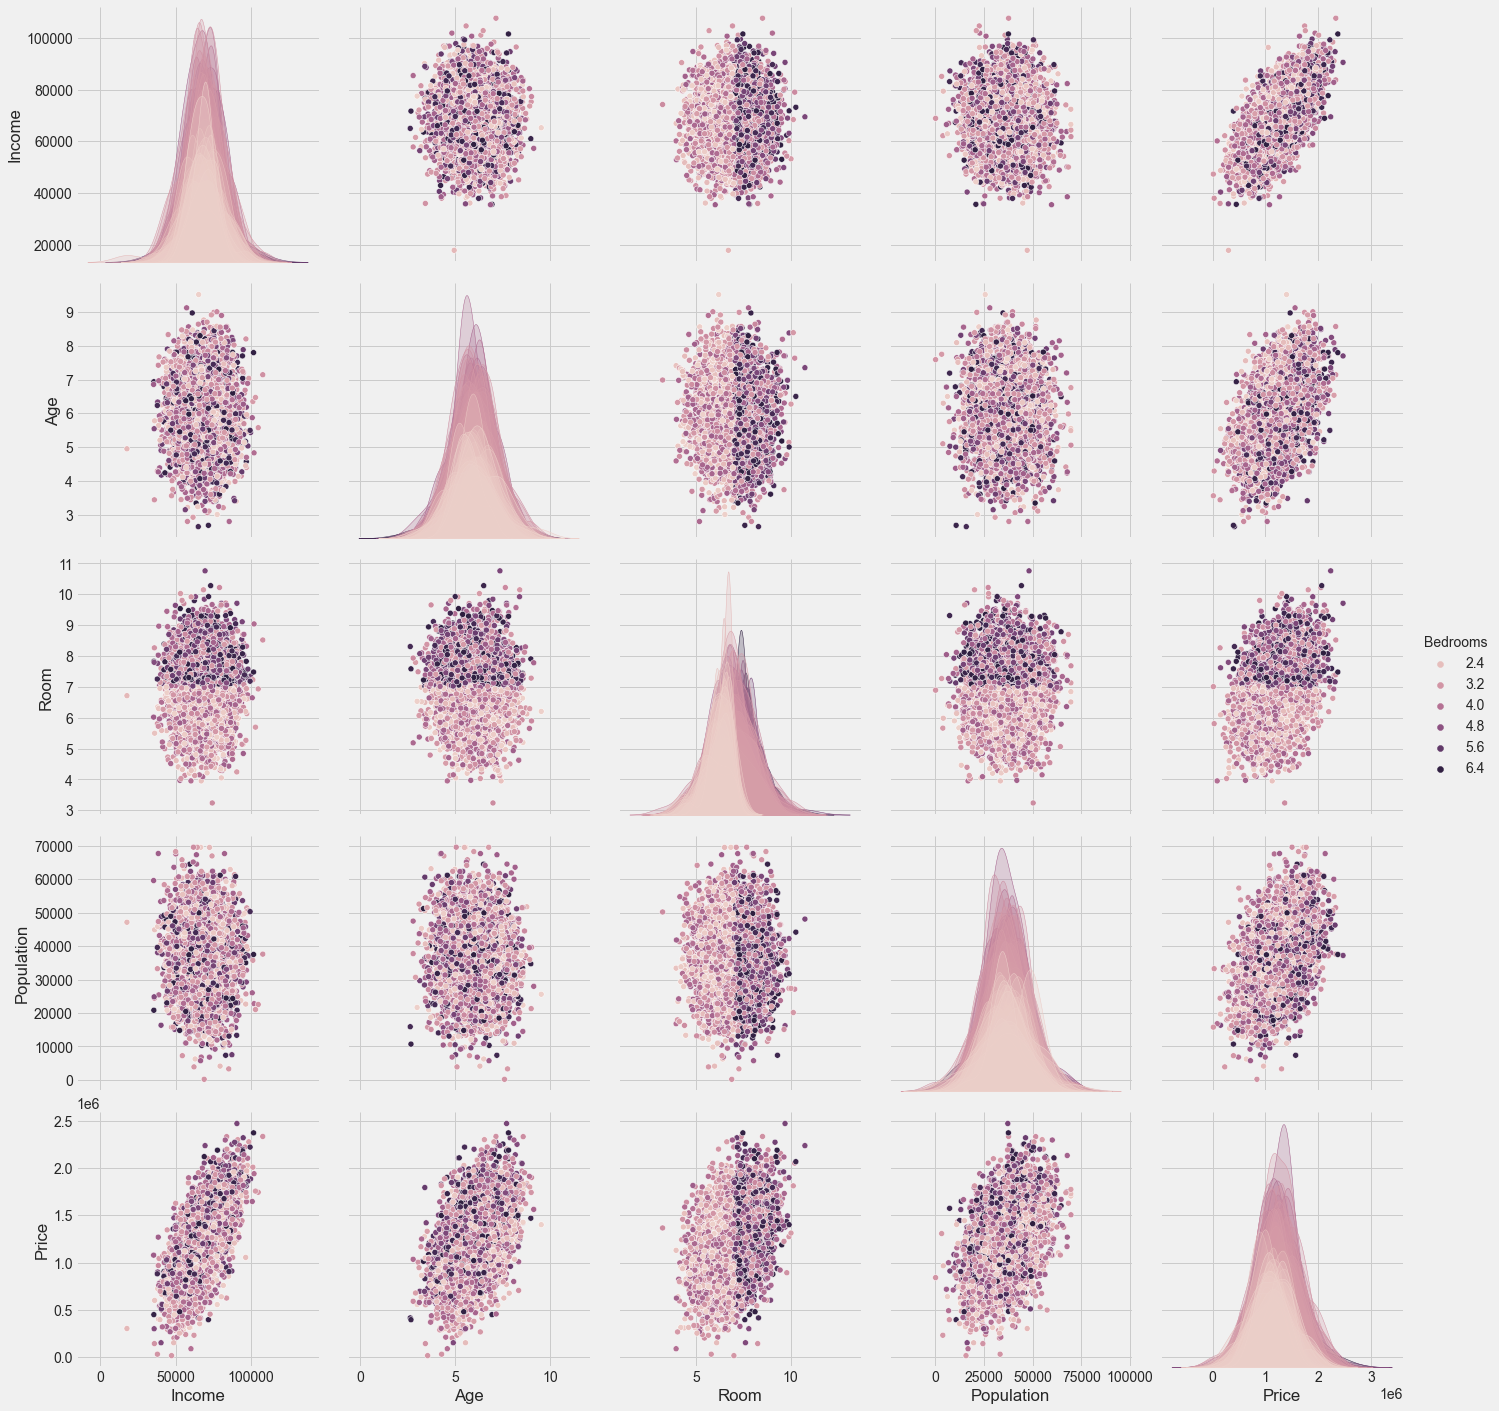

In [13]:
# Exploratory Data Analysis (EDA)
# Plot the pairwise scatter-plot between each column
sns.pairplot(df, height=4  , hue='Bedrooms')

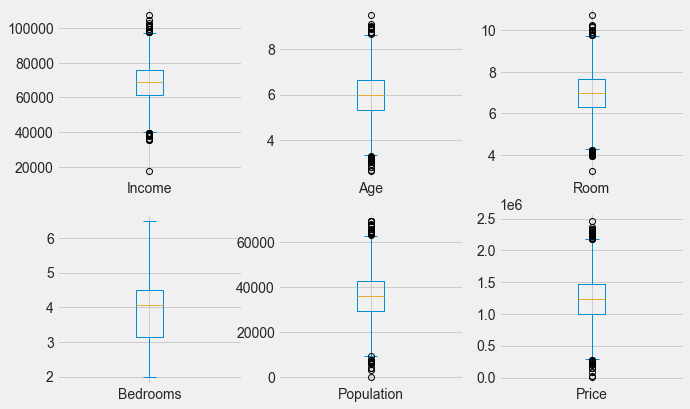

In [14]:
# Exploratory Data Analysis (EDA)
#2. Plot the distribution of the values of the dependent variable
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) 
plt.show()

<ipython-input-15-64b5711530cd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns.tolist())
<ipython-input-15-64b5711530cd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns.tolist())


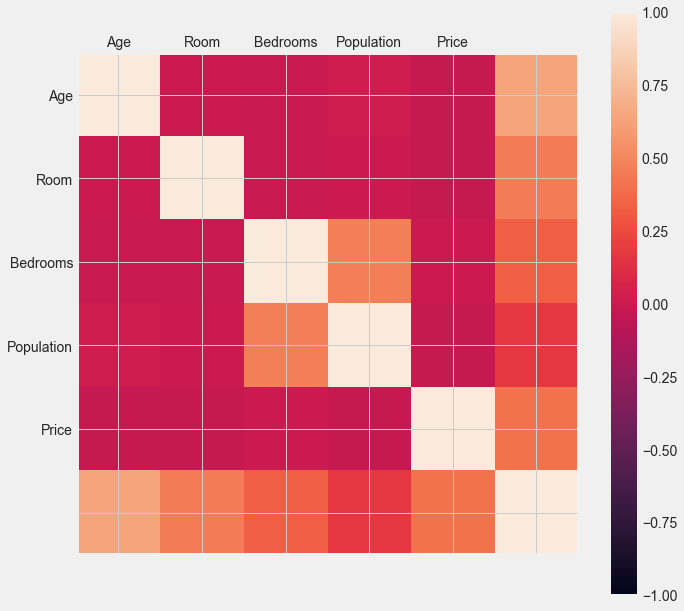

In [15]:
#simple plots to check out the data!
#3.   Plot the pairwise correlation heatmap of each column.

correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
ax.set_xticklabels(df.columns.tolist())
ax.set_yticklabels(df.columns.tolist())
fig.colorbar(cax)
plt.show()


Answer questions:

1.  What are the assumptions of the linear regression model?
- 
2.  Can we accept the basic assumptions of the linear regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?


# Training a Linear Regression Model
## X and y arrays

Tasks:

1. Split the data-frame into an `X` array and and `y` array
2. Are all columns useful for linear regression? Is there some that should be excluded? Exclude the useless ones

In [16]:
# question 2 addresses have already been removed
array = df.values
array
array.shape


(5000, 6)

In [17]:
# separate array into input and output components
X = array[:,0:5]
y = array[:,5]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
rescaledX: np.ndarray
print(rescaledX[:5, :])
print(rescaledX[-1])
print(y)

[[ 1.029 -0.297  0.021  0.088 -1.318]
 [ 1.001  0.026 -0.256 -0.722  0.404]
 [-0.685 -0.112  1.516  0.931  0.072]
 [-0.491  1.222 -1.393 -0.585 -0.187]
 [-0.807 -0.945  0.847  0.202 -0.988]]
[-0.288  0.015 -0.194  0.072  1.042]
[1059033.558 1505890.915 1058987.988 ... 1030729.583 1198656.872
 1298950.48 ]


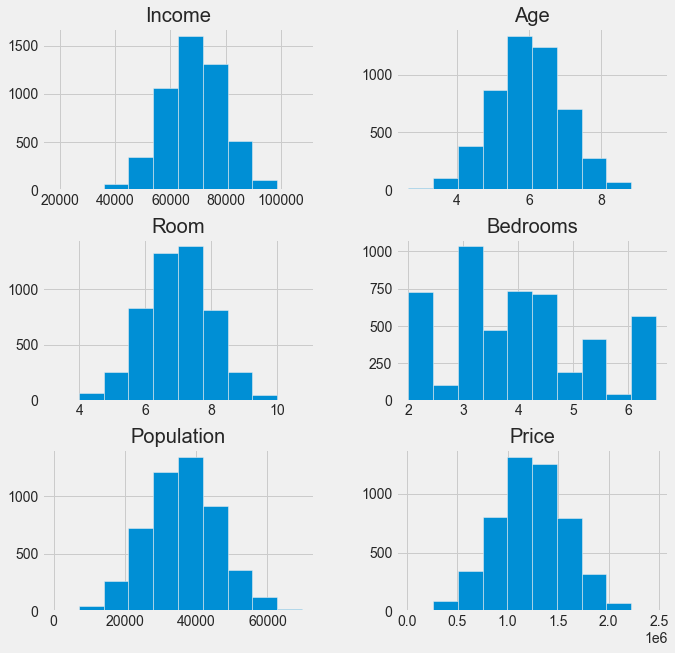

In [18]:
df.hist()
plt.show()

## Train / Test Split

We need to split the data into the train and test subsets.

In [19]:
from sklearn.model_selection import train_test_split

# Split the data here

In [23]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    #Print mean absolute error
    print('MAE:', mae)
    #Print mean square error
    print('MSE:', mse)
    # Print root square error
    print('RMSE:', rmse)
    # Print R2 score
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    # Fill in the code necessary to calculate these metrics and use this
    # function to print them in the previous function
    return mae, mse, rmse, r2_square

# Preparing Data For Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.

Assess the following steps using the plots you made earlier and answer whether the assumtions and conditions are being met:

- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).

Answer:

- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

Answer:

- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.

Answer:

- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.

Answer: 


In [21]:
# Hint:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Linear Regression

Take the most correlated dependent/independent pair and calculate the `beta` parameters for Simple linear regression.

Use `skitlearn` to fit the linear model and see if your calculation corresponds to what the library did.

Use `skitlearn` to fit the linear model dependent on all independent variables (normalize inputs).

## Model Evaluation

Check the model coefficients and and describe how can we interpret them.

Tasks:

Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of ???**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of ???**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of ???**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of ???**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of ???**.

## Predictions from our Model

Tasks:

1.  Take the test data and plot the predicted vs. true value scatter plot.

2.  Plot the histogram of residual values

3.  Make a scatter plot of residuals depending on the predicted value.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, and is easier to calculate derivations.
- **RMSE** RMSE is more interpretable.

> All of these are **loss functions**, and we want to minimize them.


Tasks:

1.  What is the interpretation of the $R^2$ score?

2.  Pack these values into a Pandas data frame

# Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

Tasks:

1.  Fit the data to polynomial model of degree 2
2.  Repeat the analysis from the simple regression and show the loss functions
3.  Did polynomoial regression improve the fit? how did you come to that conclusion?

In [22]:
# Hint:
from sklearn.preprocessing import PolynomialFeatures


# Artficial Neural Networks



Tasks:

1.  Build a neural network using Keras or PyTorch and fit the weights to predict the house price.

2.  Train the neural network for 100 epochs.

3.  What are the losses compared to the linear model?

4.  Is the neural network performin better or worse?